In [1]:
# Import modules
import numpy as np

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


p=[2,2,5]
def weight(x, *args):
    p = x

    return p[0]+p[1]-p[2]
lb = [10, 1, 0.01]
ub = [30, 3, 0.25]

xopt, fopt = pso(weight, lb, ub,maxiter=1000)

In [2]:
    #Fixed parameters
n=8
q=((0,0),(0,40),(0,50),(20,45),(46,50),(50,48),(50,35),(30,5),(30,3));
qs=(0,0)
qf=(50,0)
Vc=18
Vh=54
th=1/3
tr=1/6
epsilon=0.00001
g=[1, 1, 1, 1, 0, 1, 0]

p_weight=100
"""   
    for i in range(1,8):
        g[i-1]=int(distance((X[:, i*4],X[:, i*4+1]), (X[:, (i-1)*4],X[:, (i-1)*4+1])) > distance((X[:, (i-1)*4+2],X[:, (i-1)*4+3]), (X[:, (i-1)*4],X[:, (i-1)*4+1])))
            
"""

'   \nfor i in range(1,8):\n    g[i-1]=int(distance((X[:, i*4],X[:, i*4+1]), (X[:, (i-1)*4],X[:, (i-1)*4+1])) > distance((X[:, (i-1)*4+2],X[:, (i-1)*4+3]), (X[:, (i-1)*4],X[:, (i-1)*4+1])))\n        \n'

In [3]:
tt=-0.5


In [4]:
np.int_((-1<tt)&(tt<0))

1

In [5]:

def distance(query, target):
    x_dist = (target[0] - query[0])**2
    y_dist = (target[1] - query[1])**2
    dist = np.sqrt(x_dist + y_dist )
    return dist


def cost_function(X):
    
    for i in range(1,n):
    
        g[i-1]=np.int_(distance((X[:, i*4],X[:, i*4+1]), (X[:, (i-1)*4],X[:, (i-1)*4+1]))
                   > distance((X[:, (i-1)*4+2],X[:, (i-1)*4+3]), (X[:, (i-1)*4],X[:, (i-1)*4+1])))
    
    
    t1=(X[:, 0],X[:, 1])
    Ts=distance(qs, t1)/Vc
    ln=(X[:, 4*n-2],X[:, 4*n-1])
    Tf=distance(qf, ln)/Vc
    #################
    f=[]
    f.append(0)
    
    
    for i in range(1,n+1):
        f.append((1/Vh)*(distance(q[i], (X[:, (i-1)*4],X[:, (i-1)*4+1])
                                 )
                         + distance(q[i], (X[:, (i-1)*4+2],X[:, (i-1)*4+3])
                                   ) 
                        )+X[:, 31+i]
                )
        
      
    pT=[]
    pT.append(0)
          
    for i in range(1,n+1):
        tt= f[i]-th
        #pT.append(    p_weight*np.int_((1>tt)&(tt>0))   )
        #pT.append(    p_weight*np.int_(tt>0)   )
        pT.append(p_weight*np.int_(tt>epsilon))
        
        
    ##########
    
    d=[]
    d.append(0)
    
    for i in range(1,n):
        d.append(distance((X[:, i*4],X[:, i*4+1]), (X[:, (i-1)*4+2],X[:, (i-1)*4+3]))/Vc)
    
    
    #########
    tm=Ts+Tf+ sum(f[i] for i in range(1,n+1)) + sum((2*g[i-1]-1)*d[i] for i in range(1,n))
    #########
    
    s=[]
    s.append(0)
    s.append(f[1]-(1-g[0])*d[1])
    #s.append(0.1960906793489281)
    for i in range(2,n):
        s.append(f[i] -(1-g[i-2])*d[i-1] -(1-g[i-1])*d[i])
    s.append(f[n]-(1-g[n-2])*d[n-1])
    
    #########
    
    #pT1

    for i in range(1,n+1):
        tt= distance(  (X[:, (i-1)*4],X[:, (i-1)*4+1]),q[i]  ) +distance(q[i], (X[:, (i-1)*4+2],X[:, (i-1)*4+3]))-Vh*f[i]
        #pT.append(    p_weight*np.int_((1>tt)&(tt>0))     )
        #pT.append(    p_weight*np.int_(tt>0)   )
        pT.append(    p_weight*np.int_(tt>epsilon)   ) 
    
    
    
    
    
    """
    X
    #pT2

    for i in range(1,n):
        tt=distance((X[:, (i)*4],X[:, (i)*4+1]),   (X[:, (i-1)*4+2],X[:, (i-1)*4+3]) ) - Vc*d[i]
        #pT.append(  p_weight*np.int_(1>    ((abs(tt)+tt )/2 ) ) )
        pT.append(   (abs(tt)+tt )/2   )   
    X
    """
    
    
    
    
    
    #pT3
    
    
    for i in range(2,n):
        
        tt=distance(g[i-2]*(X[:, (i-1)*4],X[:, (i-1)*4+1])   +   (1-g[i-2])*(X[:, (i-2)*4+2],X[:, (i-2)*4+3]),
                        (1-g[i-1])*(X[:, (i)*4],X[:, (i)*4+1])  + g[i-1]*(X[:, (i-1)*4+2],X[:, (i-1)*4+3])
                    )-s[i]*Vc
        #pT.append(    p_weight*np.int_((1>tt)&(tt>0))  )
        #pT.append(    p_weight*np.int_(tt>0)   )
        pT.append(    p_weight*np.int_(tt>epsilon)   ) 
    
    
    """
    for i in range(2,n):
        o=  (X[:, (i-1)*4],X[:, (i-1)*4+1])*np.int_(g[i-2]==1) +(X[:, (i-2)*4+2],X[:, (i-2)*4+3])*np.int_(g[i-2]==0)
        d= (X[:, (i-1)*4+2],X[:, (i-1)*4+3])*np.int_(g[i-1]==1) + (X[:, (i)*4],X[:, (i)*4+1])*np.int_(g[i-1]==0)
        tt=distance(o,d)-s[i]*Vc
        pT.append(    p_weight*np.int_(tt>epsilon)   ) 
        
    """
    
    
    """
    #pT4
    for i in range(2,n):
        tt=abs( s[i]+(1-g[i-2])*d[i-1]+(1-g[i-1])*d[i]-f[i])
        pT.append(    p_weight*np.int_(tt>epsilon)   )
    
    
    
    
    #pT4

    pT.append(    p_weight*np.int_(1>   sum(abs( s[i]+(1-g[i-2])*d[i-1]+(1-g[i-1])*d[i]-f[i]) for i in range(2,n)
                                           )
                                  )  
             )
    
    
    pT.append(  sum(abs( s[i]+(1-g[i-2])*d[i-1]+(1-g[i-1])*d[i]-f[i]
                     ) for i in range(2,n)
                 )     
             )
    X
    """
    
    
    
    #pT5
    
    for i in range(2,n):
        tt=s[i]+g[i-2]*d[i-1]+g[i-1]*d[i]-tr
        #pT.append(    p_weight*np.int_((-1<tt)&(tt<0)) )
        #pT.append(    p_weight*np.int_(tt<0)   )
        pT.append(    p_weight*np.int_(tt<-epsilon)   )
         
    
    
    
    
    #pT6
    
    tt=g[0]*distance( (X[:, 0],X[:, 1]), (X[:, 2],X[:, 3])) + (1-g[0])*distance( (X[:, 0],X[:, 1]), (X[:, 4],X[:, 5]))-s[1]*Vc
    #pT.append(    p_weight*np.int_((1>tt)&(tt>0)) )
    #pT.append(    p_weight*np.int_(tt>0)   )
    pT.append(    p_weight*np.int_(tt>epsilon)   )
    """    
    tt=distance( (X[:, 0],X[:, 1]), (X[:, 2],X[:, 3]))-s[1]*Vc
    pT.append(    p_weight*np.int_(tt>epsilon)   )
    """
    
    
    """
    #pT7
    
    pT.append( abs( s[1]+(1-g[0])*d[1] -f[1]
                 ))
    
    #pT7
    tt=abs( s[1]+(1-g[0])*d[1] -f[1]
                 )
    pT.append(    p_weight*np.int_(tt>epsilon)   )
    """
    
    #pT8

    tt=g[6]*distance((X[:, 4*n-4],X[:, 4*n-3]), (X[:, 4*n-2],X[:, 4*n-1]))+(1-g[n-2])*distance((X[:,  4*n-4],X[:,  4*n-3]), (X[:, 4*n-6],X[:, 4*n-5]))-s[n]*Vc
        
    #pT.append(p_weight*np.int_((1>tt)&(tt>0)) )
    #pT.append(    p_weight*np.int_(tt>0)   )
    pT.append(    p_weight*np.int_(tt>epsilon)   )
    
    """
    #pT9

    pT.append(  abs( s[n]+(1-g[n-2])*d[n-1]-f[n]))
    
    #pT9
    tt=abs( s[n]+(1-g[n-2])*d[n-1]-f[n])
    pT.append(    p_weight*np.int_(tt>epsilon)   )
    """
    
    
    
    p=sum(pT[k] for k in range(1,len(pT)))
    tmp=tm+p
    return tmp

In [6]:
np.int_(True)

1

In [7]:
"""
a=np.array([ 3.0121253297926383 ,  35.66374454163622,  3.309208259658977 ,  39.18085205605943, 
            3.5234839866838237 ,  41.71821401130619,  7.945629628000999 ,  45.773411606771525,  
            16.735567829802008 ,  45.753340818417435, 19.808753103090282 ,  45.74682499114571,  
           35.29866793184733 ,  45.710057054978485 , 41.279615359351325 ,  45.69599370051821, 
            41.300078778934775 ,  45.69594661333745,  44.68140266520942 ,  40.739474556527874,
            44.68017164112507 ,  40.741337154195946,  42.67055769861523 ,  35.57038169820235,  
            33.21559066143344 ,  11.265359467028691 ,  32.25015649069365 ,  9.752891596205222,  
            32.86156707323325 ,  10.355379952774154, 39.995737007303916 ,  1.5004805713873761,
           
            0.035185882703834465,1.3001631438136485e-09,0.09441525246987069,0.0004761083988295556,
            9.863181937852517e-10,0.027172591678064795,0.056142718813241815,8.259097294960327e-10])





"""

a=np.array([ 0 ,  40,  0 ,  40, 
            0,50,  0,50,  
            20,45, 20,45,  
           46,50 , 46,50, 
            50,48,  50,48,
            50,35,  50,35,  
           30,5 ,  30,5,  
           30,3, 30,3,
           
           0,0,0,0,
           0,0,0,0])



"""
for i in range(1,n):
    g[i-1]=int(distance((a[i*4],a[ i*4+1]), (a[ (i-1)*4],a[ (i-1)*4+1])) > distance((a[ (i-1)*4+2],a[ (i-1)*4+3]), (a[ (i-1)*4],a[(i-1)*4+1])))
"""

'\nfor i in range(1,n):\n    g[i-1]=int(distance((a[i*4],a[ i*4+1]), (a[ (i-1)*4],a[ (i-1)*4+1])) > distance((a[ (i-1)*4+2],a[ (i-1)*4+3]), (a[ (i-1)*4],a[(i-1)*4+1])))\n'

In [8]:
import random
import pyswarms.backend as P
p=P.generate_swarm(n_particles=1, dimensions=5*n)
#b=p+a
b=a

init=np.vstack((a,b))

for i in range(1,9):
    p=P.generate_swarm(n_particles=1, dimensions=5*n)
    b=random.uniform(0,1)*p*(-1)**i+a
    #b=a
    
    init=np.vstack((init,b))

In [9]:
#init

In [10]:
%%time
# Set-up hyperparameters
options = {'c1': 2, 'c2': 2, 'w':0.6}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=5*n, options=options,init_pos=init)


# Perform optimization
cost, pos = optimizer.optimize(cost_function, iters=1)

2020-09-15 11:14:33,151 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 2, 'c2': 2, 'w': 0.6}
pyswarms.single.global_best: 100%|██████████|1/1, best_cost=9.6
2020-09-15 11:14:33,280 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 9.602407213535106, best pos: [ 0. 40.  0. 40.  0. 50.  0. 50. 20. 45. 20. 45. 46. 50. 46. 50. 50. 48.
 50. 48. 50. 35. 50. 35. 30.  5. 30.  5. 30.  3. 30.  3.  0.  0.  0.  0.
  0.  0.  0.  0.]


CPU times: user 29.8 ms, sys: 9.63 ms, total: 39.4 ms
Wall time: 158 ms


In [11]:
3.529632209626121-0.16090479664509363*18

0.6333458700144354

In [12]:
#d=np.vstack((init,a,c))

In [13]:
3.529632209626121-0.1960906793489281*18

-1.865458498784278e-08

In [14]:
pos

array([ 0., 40.,  0., 40.,  0., 50.,  0., 50., 20., 45., 20., 45., 46.,
       50., 46., 50., 50., 48., 50., 48., 50., 35., 50., 35., 30.,  5.,
       30.,  5., 30.,  3., 30.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])


import matplotlib.pyplot as plt
plt.xlabel("x/km")
plt.ylabel("y/km")

plt.plot([pos[0], qs[0]],[pos[1],  qs[1]], color= 'b')
plt.plot([pos[30], qf[0]],[pos[31],  qf[1]], color= 'b')

for i in range(1,8):
    
    plt.plot([pos[(i-1)*4], pos[(i-1)*4+2]],[pos[(i-1)*4+1],  pos[(i-1)*4+3]], color= 'b')
    plt.plot([pos[(i)*4], pos[(i-1)*4+2]],[pos[(i)*4+1],  pos[(i-1)*4+3]], color= 'b')

    
"""        
    else:
        plt.plot([tx[i].X, tx[i+1].X],[ty[i].X,  ty[i+1].X], color= 'b')
        plt.plot([lx[i].X, tx[i+1].X],[ly[i].X,  ty[i+1].X], color= 'b')
        plt.plot([lx[i].X, lx[i+1].X],[ly[i].X,  ly[i+1].X], color= 'b')
        
if g[7].X==1:
    plt.plot([tx[8].X, lx[8].X],[ty[8].X,  ly[8].X], color= 'b')
"""
plt.plot([pos[28], pos[30]],[pos[29],  pos[31]], color= 'b')

for i in range(1,9):
    plt.plot([q[i][0] ,  pos[(i-1)*4+2]] ,[q[i][1],  pos[(i-1)*4+3]],linestyle= '--')
    plt.plot([pos[(i-1)*4], q[i][0]],[pos[(i-1)*4+1],  q[i][1]],linestyle= '--')
    plt.plot(q[i][0], q[i][1], marker='*',color='r')
    


In [15]:
import matplotlib.pyplot as plt

final_g=[1,1,1,1,1,1,1]

for i in range(1,8):
    final_g[i-1]=int(distance((pos[i*4],pos[ i*4+1]), (pos[ (i-1)*4],pos[ (i-1)*4+1])) > distance((pos[ (i-1)*4+2],pos[ (i-1)*4+3]), (pos[ (i-1)*4],pos[(i-1)*4+1])))

plt.xlabel("x/km")
plt.ylabel("y/km")

plt.plot([pos[0], qs[0]],[pos[1],  qs[1]], color= 'b')
plt.plot([pos[30], qf[0]],[pos[31],  qf[1]], color= 'b')


for i in range(1,8):
    if final_g[i-1]==1:
        plt.plot([pos[(i-1)*4], pos[(i-1)*4+2]],[pos[(i-1)*4+1],  pos[(i-1)*4+3]], color= 'b')
        plt.plot([pos[(i)*4], pos[(i-1)*4+2]],[pos[(i)*4+1],  pos[(i-1)*4+3]], color= 'b')
        if final_g[i-1]==0:
            plt.plot([pos[(i-1)*4], pos[(i-1)*4+2]],[pos[(i-1)*4+1],  pos[(i-1)*4+3]], color= 'b')
        
    else:
        plt.plot([pos[(i-1)*4], pos[(i)*4]],[pos[(i-1)*4+1],  pos[(i)*4+1]], color= 'b')
        plt.plot([pos[(i-1)*4+2], pos[(i)*4]],[pos[(i-1)*4+3],  pos[(i)*4+1]], color= 'b')
        plt.plot([pos[(i-1)*4+2], pos[(i)*4+2]],[pos[(i-1)*4+3],  pos[(i)*4+3]], color= 'b')
        

            
        
        
if final_g[6]==1:
    plt.plot([pos[28], pos[30]],[pos[29],  pos[31]], color= 'b')

for i in range(1,9):
    plt.plot([q[i][0] ,  pos[(i-1)*4+2]] ,[q[i][1],  pos[(i-1)*4+3]],linestyle= '--')
    plt.plot([pos[(i-1)*4], q[i][0]],[pos[(i-1)*4+1],  q[i][1]],linestyle= '--')
    plt.plot(q[i][0], q[i][1], marker='*',color='r')
    


In [16]:
final_g

[1, 1, 1, 1, 1, 1, 1]

pos=[5.21871647e-02, 3.98608683e+01, 5.74530124e-02, 3.99382974e+01,
       5.71800383e-02, 3.99374656e+01, 6.59624154e+00, 4.19158409e+01,
       2.00447791e+01, 4.50339369e+01, 2.00986169e+01, 4.50389217e+01,
       4.14412530e+01, 4.75587293e+01, 4.40098679e+01, 4.52935608e+01,
       4.14555104e+01, 4.75565996e+01, 4.43858188e+01, 4.34932818e+01,
       4.41513584e+01, 3.51036025e+01, 4.19811910e+01, 3.06006352e+01,
       2.99954565e+01, 5.00148720e+00, 2.99961903e+01, 4.99867559e+00,
       2.99954226e+01, 5.00147342e+00, 5.00022373e+01, 1.10231422e-04]


In [17]:
final_g

[1, 1, 1, 1, 1, 1, 1]

In [18]:

# Import modules
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

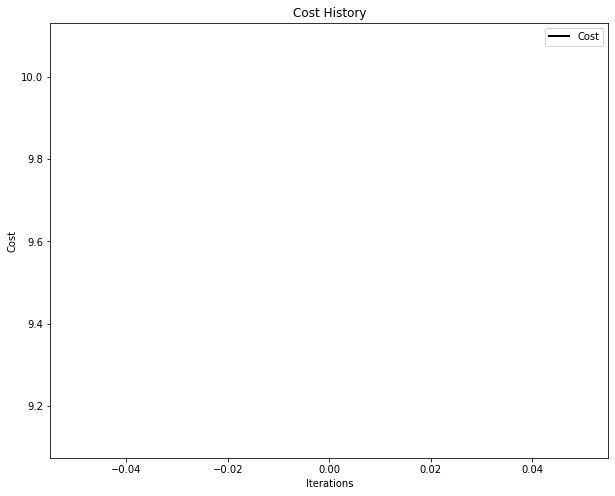

In [19]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

In [20]:
random.uniform(0,1)

0.777117372176071

In [21]:
random.uniform(0,5)

3.8840966131409265